<a href="https://colab.research.google.com/github/katemezger/Divinity_FirstYearSales_Prediction/blob/main/divinity_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [17]:
import pandas as pd
# helps with training models
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# import top earners file
# basically sorted through file personally and found best performers for a
# smaller dataset since Divinty will most definetly be apart of this set)

df = pd.read_csv('rpg_high_performers.csv')

# we do have to convert months to numbers
# this helps the ai with understanding the months and their relation to each other
month_map = { 'January' : 1, 'Feburary' : 2, 'March' : 3, 'April' : 4, 'May' : 5,
             'June' : 6, 'July' : 7, 'August' : 8, 'September' : 9, 'October' : 10,
              'November' : 11, 'December' : 12 }
df['month_numeric'] = df['release_month'].map(month_map)

# since we converted months to numbers the same thing has to happen to devs

le = LabelEncoder()
df['developer_code'] = le.fit_transform(df['developer'])

# now we have to define the x and y of this prediction
# using x and y is just easier for me to read and more reuseable
x = df[['month_numeric', 'release_price', 'developer_code']]
y = df['average_estimated_owners_number']

# now we have to train the model while hiding 20% of the data
# checks if the AI is just memorizing or not (random_state doesn't matter but
# i like 22)

x_train, x_test, y_train, y_test = train_test_split ( x, y, test_size = 0.2,
                                                     random_state = 22)


We have now properly coded the foundations for the model so now it is time to train it

In [18]:
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error

# this just helps the AI not get super high error percentages

y_train_log = np.log1p(y_train)
y_test_log = np.log1p(y_test)

# for an algorithm I like forest since it creating branches and averages the
# guesses. This is better for something like sales!

model = RandomForestRegressor(n_estimators = 100, random_state = 22)

# using .fit() for pattern recognition

model.fit(x_train, y_train_log)

# testing based on the data hid earlier
# asking the AI to predict the hidden numbers to test for accuracy

log_predictions = model.predict(x_test)

# prevents infinity errors
log_predictions = np.clip(log_predictions, a_min = None, a_max = 18.5)
final_predictions = np.expm1(log_predictions)

# error prediction
pct_error = mean_absolute_percentage_error(y_test, final_predictions)

print(f"Model trained!")
print(f"New Average Percent Error: {pct_error:.1%}")


Model trained!
New Average Percent Error: 107.8%


Okay the model is established!
Do not get me wrong 107.8% error is not great but we are working with data that is not great and it is okay to be a bit off as long as you state that the model is not perfect.
But we will still establish final predictions and insights with the data and model we have!

|---|---| DIVINITY 3 PREDICTION REPORT |---|---|
Expected Year 1 Sales: 1,909,307 units
Confidence Range: 636,436 to 636,436 units
----------------------------------------


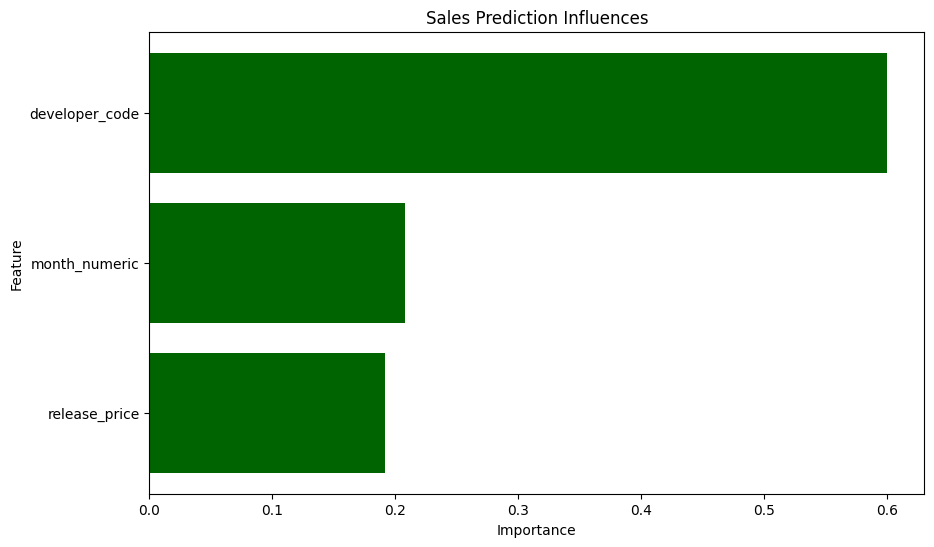

In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# prediction for Divinity
# This is assuming a release in August at $79.99

larian_id = le.transform(['Larian Studios'])[0]
divinity_sce = pd.DataFrame([[8, 79.99, larian_id]],
                            columns = ['month_numeric','release_price',
                                       'developer_code'])

# we will predict in log then expand
divinity_log_pred = model.predict(divinity_sce)
divinity_final_sales = np.expm1(divinity_log_pred)[0]

# since the % error is so high we will give some estimates for the prediciton
# I am using 3 because we are still in odd log numbers

low = divinity_final_sales / 3
high = divinity_final_sales / 3

# printing results
print(f"|---|---| DIVINITY 3 PREDICTION REPORT |---|---|")
print(f"Expected Year 1 Sales: {divinity_final_sales:,.0f} units")
print(f"Confidence Range: {low:,.0f} to {high:,.0f} units")
print("-" * 40)

# shows AI thought process (kinda)
important = model.feature_importances_
feature_names = x_train.columns
feature_df = pd.DataFrame({'Feature': feature_names, 'Importance': important})
feature_df = feature_df.sort_values(by = 'Importance', ascending = True)

# plotting data
plt.figure(figsize = (10, 6))
plt.barh(feature_df['Feature'], feature_df['Importance'], color = 'darkgreen')
plt.title('Sales Prediction Influences')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()





Prediction has been made!!
Now while we could be done it's a good idea to check in with how the AI model is working

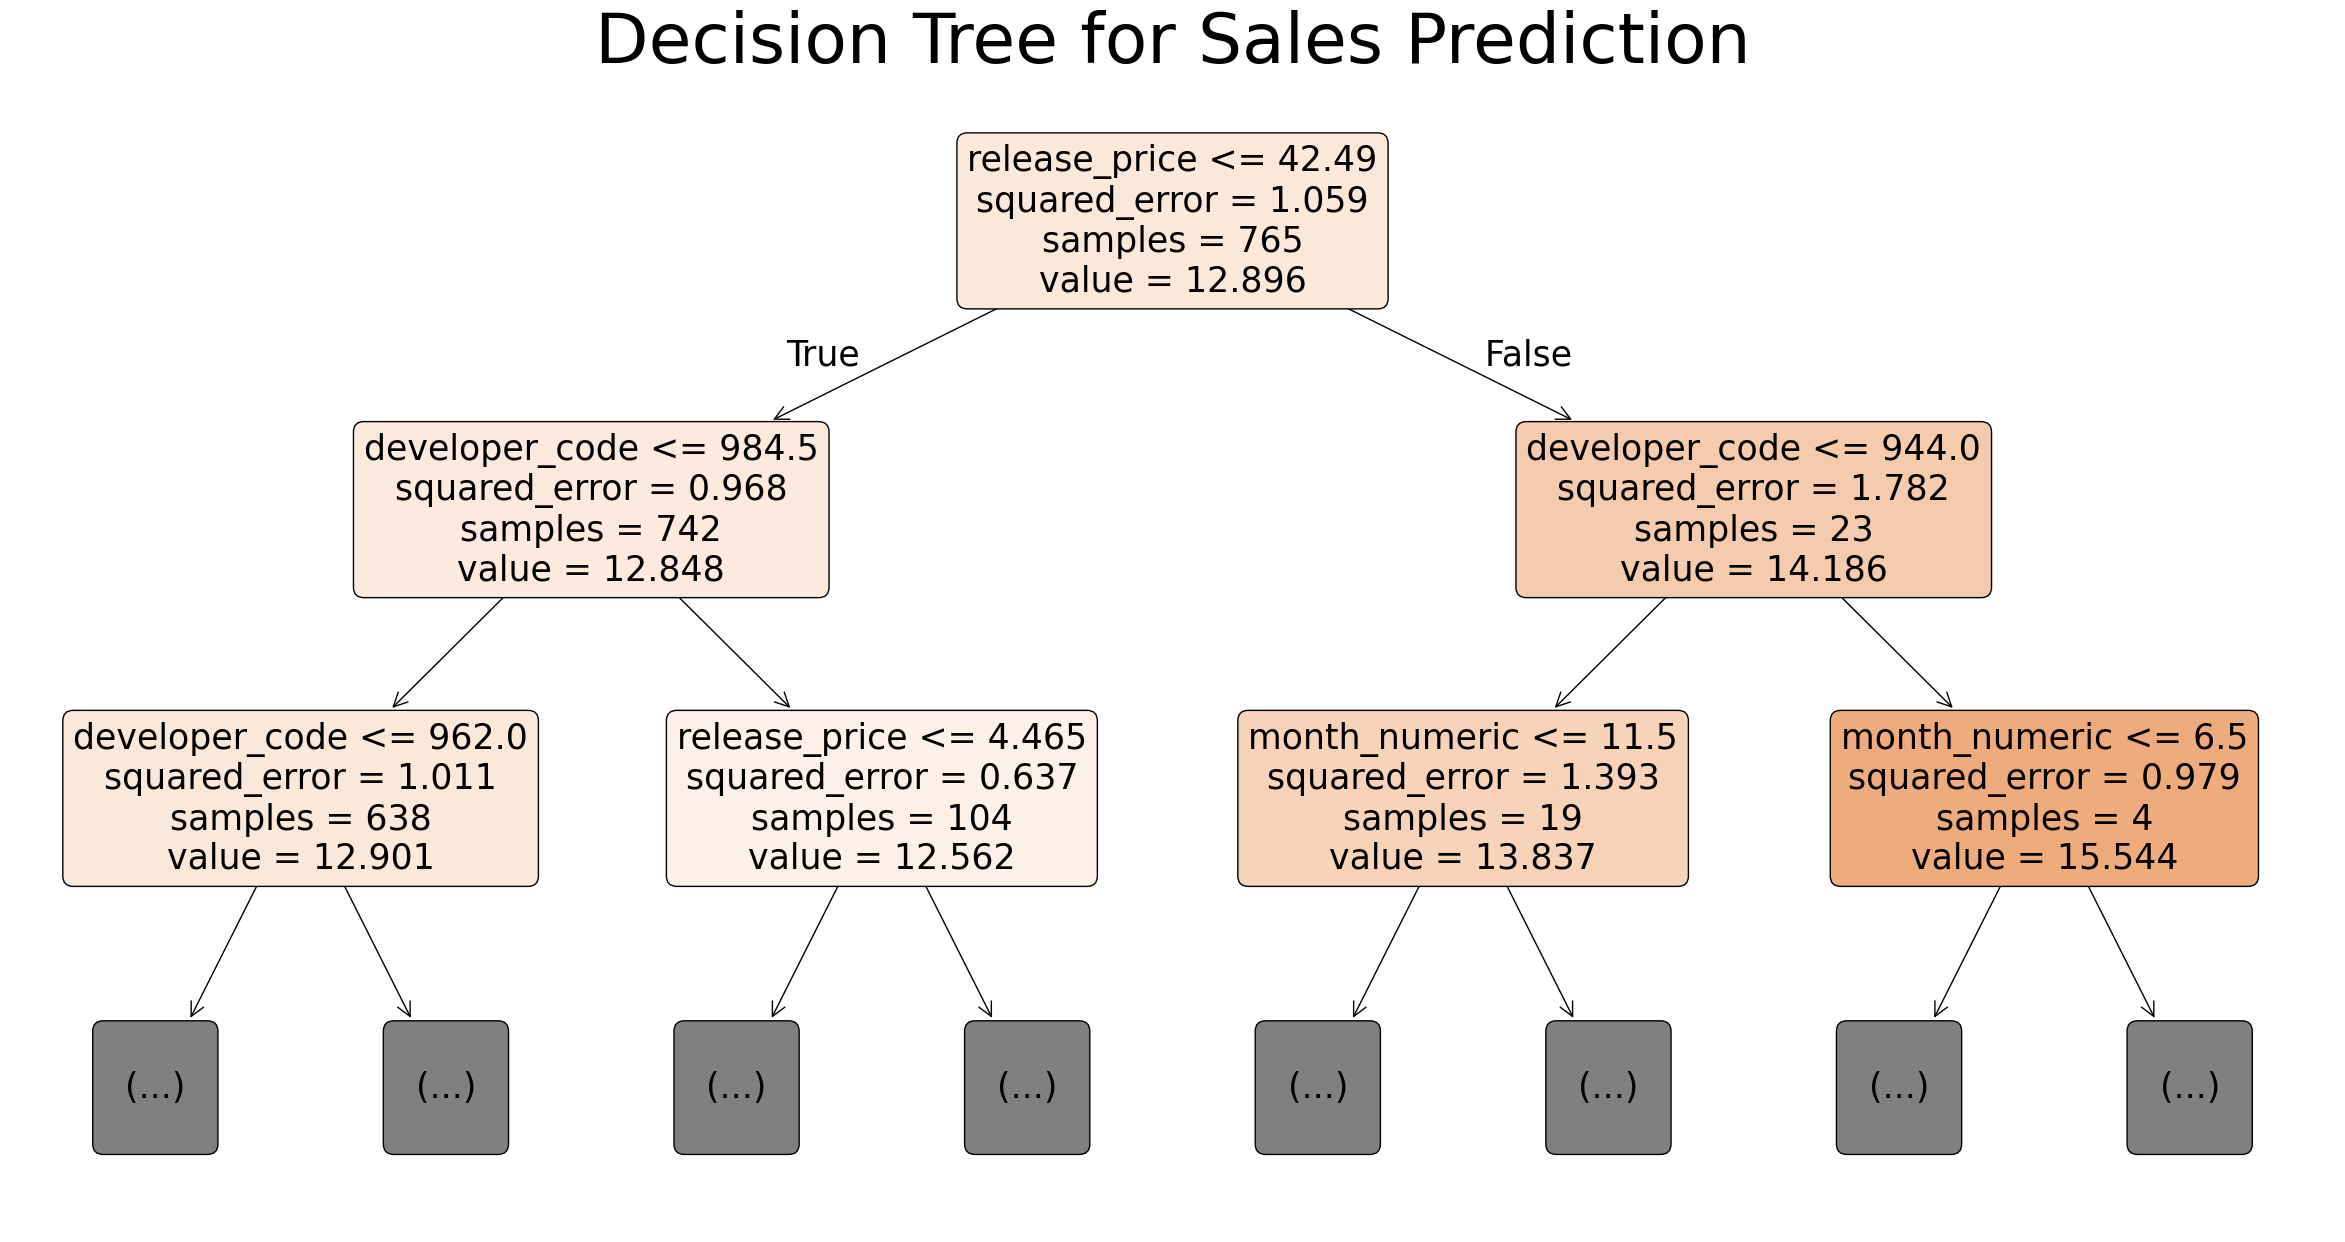

In [27]:
from sklearn.tree import plot_tree

plt.figure(figsize = (30, 15))

#labels the branches and colors them
plot_tree(model.estimators_[0], feature_names = x_train.columns, max_depth = 2,
          filled = True, rounded = True, fontsize = 25)

plt.title('Decision Tree for Sales Prediction', fontsize = 50)
plt.show()
